In [1]:
## librerías básicas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## hacer gráficos
import seaborn as sns

# Datasets

##### gender_submission.csv

In [4]:
pasajeros = pd.read_csv("bases_dadas/gender_submission.csv")

pasajeros.head()
## esto es un ejemplo de cómo tiene que ser el submission file que nosotros tengamos que hacer, no nos vale mas
## que de ejemplo

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
pasajeros.shape

(418, 2)

##### train.csv

In [9]:
train = pd.read_csv('bases_dadas/train.csv')

train.head()
## esta es la data a entrenar en nuestro modelo

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.shape

(891, 12)

##### test.csv

In [13]:
test = pd.read_csv('bases_dadas/test.csv')

test.head()
## esta es la data en la que testear nuestro modelo antes de submmitearlo, como vemos no tiene el label 'survived'

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
test.shape

(418, 11)

## Explicación de labels y códigos

#### Labels:

1. 'PassengerId'  : Número de identificación del pasajero
2. 'Survived'     : Información sobre su supervivencia
3. 'Pclass'       : Clase del ticket
4. 'Name'         : Nombre del pasajero
5. 'Sex'          : Sexo del pasajero
6. 'Age'          : Edad del pasajero
7. 'SibSp'        : Número de hermanos/conyujes acompañando al pasajero
8. 'Parch'        : Número de padres/hijos acompañando al pasajero
9. 'Ticket'       : Número del ticket del pasajero
10. 'Fare'         : Tárifa pagada por el pasajero
11. 'Cabin'        : Identificación de la cabina del pasajero
12. 'Embarked'     : Puerto en el que el pasajéro embarcó

#### Códigos:

1. 'Survived'     : 0 = Fallecido; 1 = Superviviente
2. 'Pclass'       : 1 = Primera clase; 2 = Segunda clase; 3 = Tercera clase
3. 'Embarked'     : C = Cherburgo, Q = Queenstown, S = Southampton

# EDA

In [2]:
## Todos estos gráficos los hago con la data a entrenar 'train.csv'

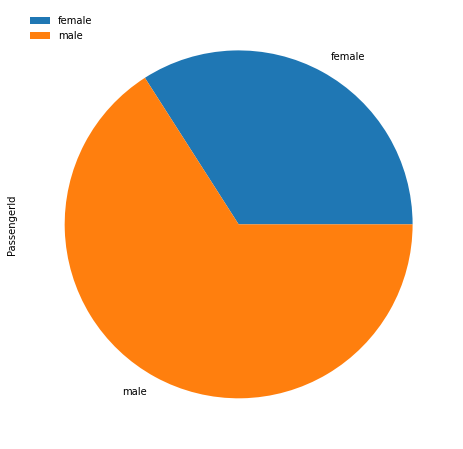

In [18]:
## Gráfico circular para comparar a los pasajeros por sexo
plt.figure(figsize=(12, 8))
train.PassengerId.groupby(train.Sex).sum().plot(kind='pie')
plt.legend(loc='upper left', frameon=False)
plt.show()

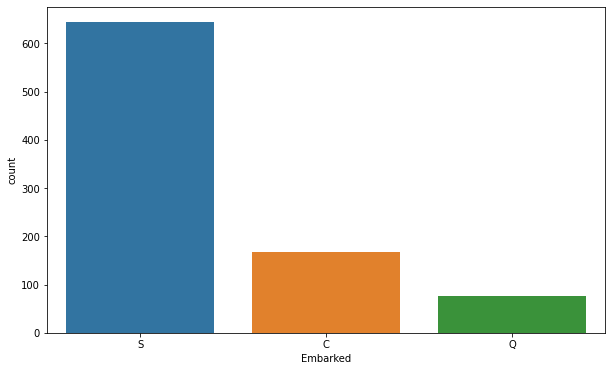

In [21]:
## Gráfico de barras para ver cuántos pasajeros embarcaron en cada puerto
plt.figure(figsize=(10,6))
sns.countplot('Embarked',data=train)
plt.show()

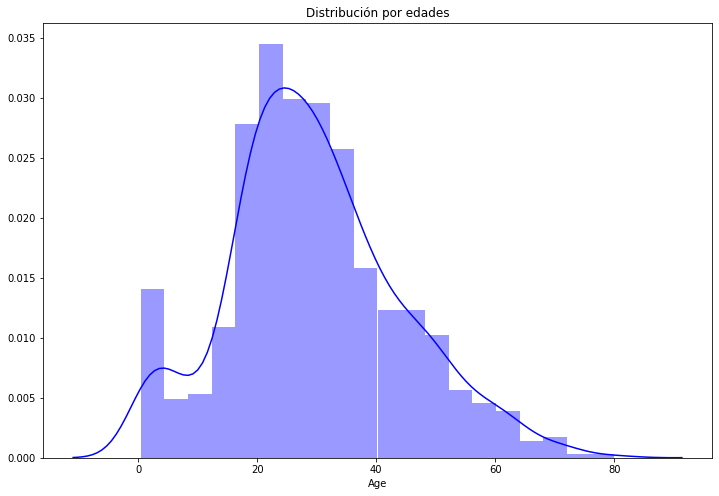

In [22]:
# Distribución de los pasajeros por edades

plt.figure(figsize=(12, 8))
sns.distplot(train['Age'], 
             color='blue')
plt.title('Distribución por edades')
plt.show()

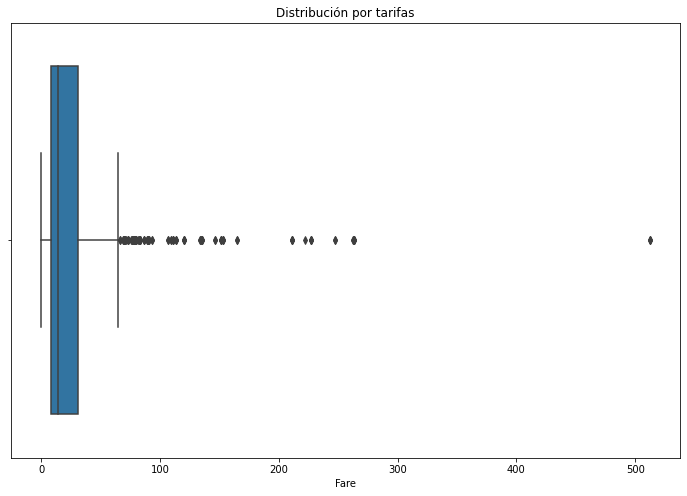

In [23]:
## Boxplot con las tarifas pagadas por cada pasajero
plt.figure(figsize=(12, 8))
sns.boxplot(train['Fare'])
plt.title('Distribución por tarifas')
plt.show()

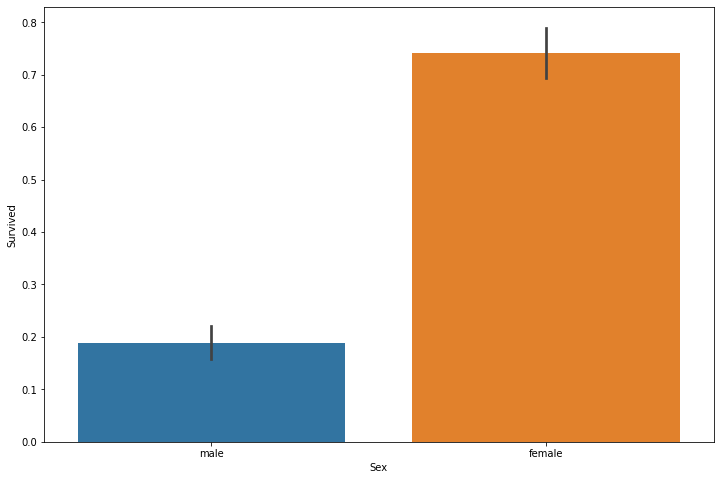

In [25]:
# Ratio de supervivencia en función al sexo del pasajero
plt.figure(figsize = (12,8))
sns.barplot(x='Sex', y='Survived', data=train)
plt.show()
## casi el 80% de los salvados fueron mujeres

/home/propietario/.local/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


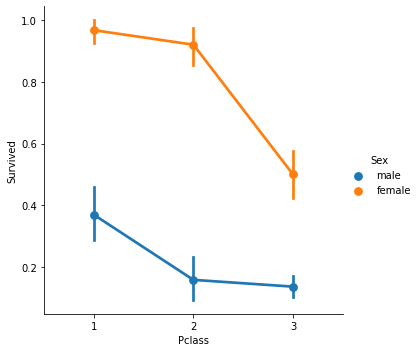

In [27]:
## Ratio de supervivencia de los pasajeros en funcion a la clase de su billete y su sexo
sns.factorplot('Pclass','Survived',hue='Sex',data=train)
plt.show()
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [30]:
## Matriz de correlación entre los labels
train = train.corr()
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.175432,-0.018991,0.327951,-0.576930,-0.604423,-0.230266
Survived,-0.175432,1.000000,-0.797626,0.274922,-0.215250,-0.017794,0.791444
Pclass,-0.018991,-0.797626,1.000000,-0.684716,0.423354,0.220679,-0.919066
Age,0.327951,0.274922,-0.684716,1.000000,-0.851328,-0.745940,0.386511
SibSp,-0.576930,-0.215250,0.423354,-0.851328,1.000000,0.909548,-0.062584
Parch,-0.604423,-0.017794,0.220679,-0.745940,0.909548,1.000000,0.135580
Fare,-0.230266,0.791444,-0.919066,0.386511,-0.062584,0.135580,1.000000


<AxesSubplot:>

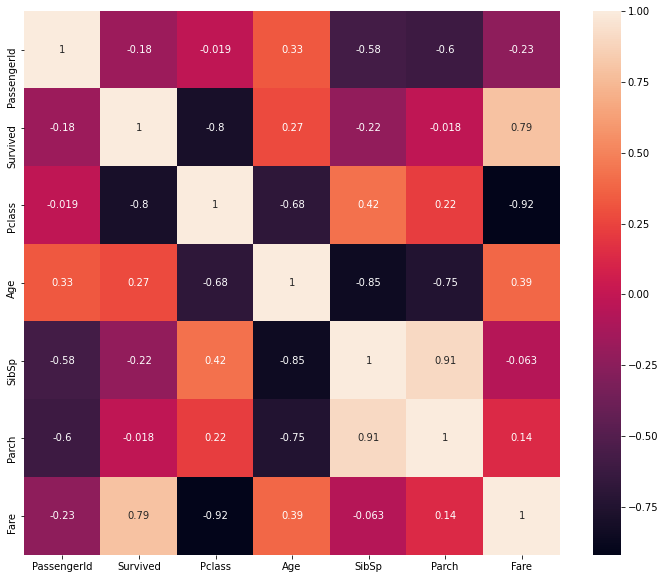

In [32]:
## Heatmap de correlación entre los labels
fig, ax = plt.subplots(figsize = (12,10))

sns.heatmap(train, annot=True)